<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 7.2.1: Bagging

INSTRUCTIONS:

- Read the guides and hints then create the necessary analysis and code to find an answer and conclusion for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.9667
    - **ROC AUC**  = 0.9614
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first step is to identify the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ than **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, laborious and iterative process. It is part of the process to repeat, review and change when finding a dead-end.

## Scenario: Predicting Breast Cancer
The dataset you are going to be using for this laboratory is popularly known as the **Wisconsin Breast Cancer** dataset (`breast-cancer-wisconsin-data-old.csv`). The task related to it is Classification.

The dataset contains a total number of _10_ features labelled in either **benign** or **malignant** classes. The features have _699_ instances out of which _16_ feature values are missing. The dataset only contains numeric values.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.

Answer: Will a person be diagnosed with a **Benign** or **Malignant** cancer based on the features we collected?

## Actual Question
Choose the **one** question that should be answered.

Answer: Will a person be diagnosed with a **Benign** or **Malignant** cancer based on the features we collected?

# Step 2: Find the Data
### Wisconsin Breast Cancer DataSet
- **Citation Request**

    This breast cancer databases was obtained from the **University of Wisconsin Hospitals**, **Madison** from **Dr. William H. Wolberg**. If you publish results when using this database, then please include this information in your acknowledgements.

- **Title**

    Wisconsin Breast Cancer Database (January 8, 1991)

- **Sources**
    - **Creator**
            Dr. William H. Wolberg (physician)
            University of Wisconsin Hospitals
            Madison, Wisconsin
            USA
    - **Donor**
            Olvi Mangasarian (mangasarian@cs.wisc.edu)
            Received by David W. Aha (aha@cs.jhu.edu)
    - **Date**
            15 July 1992
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/about) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

In [81]:
## Import Libraries
import itertools

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from matplotlib import rcParams

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from mlxtend.classifier import StackingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc, classification_report

import warnings
warnings.filterwarnings('ignore')

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [2]:
breast_cancer_csv = r"C:\Users\OmarZazou\OneDrive - Ediom Pty Ltd\Documents\Resources\Data Science Course\Course Material\DATA\breast-cancer-wisconsin-data-old.csv"

df = pd.read_csv(breast_cancer_csv)

In [3]:
df.head()

,Sample_number,Clump_Thickness,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [7]:
df.Sample_number.nunique()

645

In [9]:
df.Sample_number.value_counts()

1182404    6
1276091    5
1198641    3
897471     2
1116192    2
          ..
1232225    1
1236043    1
1241232    1
1241559    1
814265     1
Name: Sample_number, Length: 645, dtype: int64

We cannot use the Sample_number as index since we have duplications.

# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or spurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample_number                699 non-null    int64 
 1   Clump_Thickness              699 non-null    int64 
 2   Cell_Size_Uniformity         699 non-null    int64 
 3   Cell_Shape_Uniformity        699 non-null    int64 
 4   Marginal_Adhesion            699 non-null    int64 
 5   Single_Epithelial_Cell_Size  699 non-null    int64 
 6   Bare_Nuclei                  699 non-null    object
 7   Bland_Chromatin              699 non-null    int64 
 8   Normal_Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [10]:
df.Bare_Nuclei.unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [11]:
df[df['Bare_Nuclei'] == '?'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 23 to 617
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample_number                16 non-null     int64 
 1   Clump_Thickness              16 non-null     int64 
 2   Cell_Size_Uniformity         16 non-null     int64 
 3   Cell_Shape_Uniformity        16 non-null     int64 
 4   Marginal_Adhesion            16 non-null     int64 
 5   Single_Epithelial_Cell_Size  16 non-null     int64 
 6   Bare_Nuclei                  16 non-null     object
 7   Bland_Chromatin              16 non-null     int64 
 8   Normal_Nucleoli              16 non-null     int64 
 9   Mitoses                      16 non-null     int64 
 10  Class                        16 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 1.5+ KB


In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sample_number,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
Clump_Thickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Cell_Size_Uniformity,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Cell_Shape_Uniformity,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal_Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single_Epithelial_Cell_Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Bland_Chromatin,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Normal_Nucleoli,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


We have 16 entries with the Bare Nuclei marked as an interrogation mark (i.e. it is unkown). We can try and fill those values in as they will not significantly affect the data if we impute it.

In [14]:
df2 = df[df['Bare_Nuclei'] != '?']

In [15]:
df2

,Sample_number,Clump_Thickness,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [21]:
df2.Bare_Nuclei = pd.to_numeric(df2.Bare_Nuclei)

In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample_number                683 non-null    int64
 1   Clump_Thickness              683 non-null    int64
 2   Cell_Size_Uniformity         683 non-null    int64
 3   Cell_Shape_Uniformity        683 non-null    int64
 4   Marginal_Adhesion            683 non-null    int64
 5   Single_Epithelial_Cell_Size  683 non-null    int64
 6   Bare_Nuclei                  683 non-null    int64
 7   Bland_Chromatin              683 non-null    int64
 8   Normal_Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 64.0 KB


In [23]:
df2.Bare_Nuclei.describe()

count    683.000000
mean       3.544656
std        3.643857
min        1.000000
25%        1.000000
50%        1.000000
75%        6.000000
max       10.000000
Name: Bare_Nuclei, dtype: float64

<Axes: >

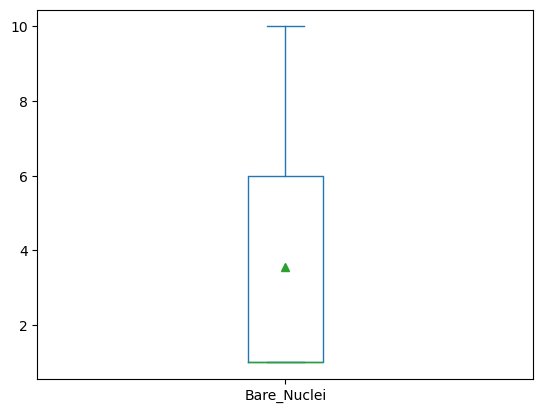

In [29]:
df2.Bare_Nuclei.plot(kind='box', showmeans=True)

We will substitute the '?' values of Bare Nuclei in the original df by the value 1 as it is the median and the values occurs over 2/3 of the times which makes it a pretty safe assumption to use it as 1.

In [32]:
df.Bare_Nuclei.replace('?', '1', inplace=True)

In [33]:
df.Bare_Nuclei.unique()

array(['1', '10', '2', '4', '3', '9', '7', '5', '8', '6'], dtype=object)

In [34]:
df.Bare_Nuclei = pd.to_numeric(df.Bare_Nuclei)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample_number                699 non-null    int64
 1   Clump_Thickness              699 non-null    int64
 2   Cell_Size_Uniformity         699 non-null    int64
 3   Cell_Shape_Uniformity        699 non-null    int64
 4   Marginal_Adhesion            699 non-null    int64
 5   Single_Epithelial_Cell_Size  699 non-null    int64
 6   Bare_Nuclei                  699 non-null    int64
 7   Bland_Chromatin              699 non-null    int64
 8   Normal_Nucleoli              699 non-null    int64
 9   Mitoses                      699 non-null    int64
 10  Class                        699 non-null    int64
dtypes: int64(11)
memory usage: 60.2 KB


In [36]:
df.Class.unique()

array([2, 4], dtype=int64)

The UCI ML Repository website shows that the Class 2 is for Benign and 4 is for Malignant.

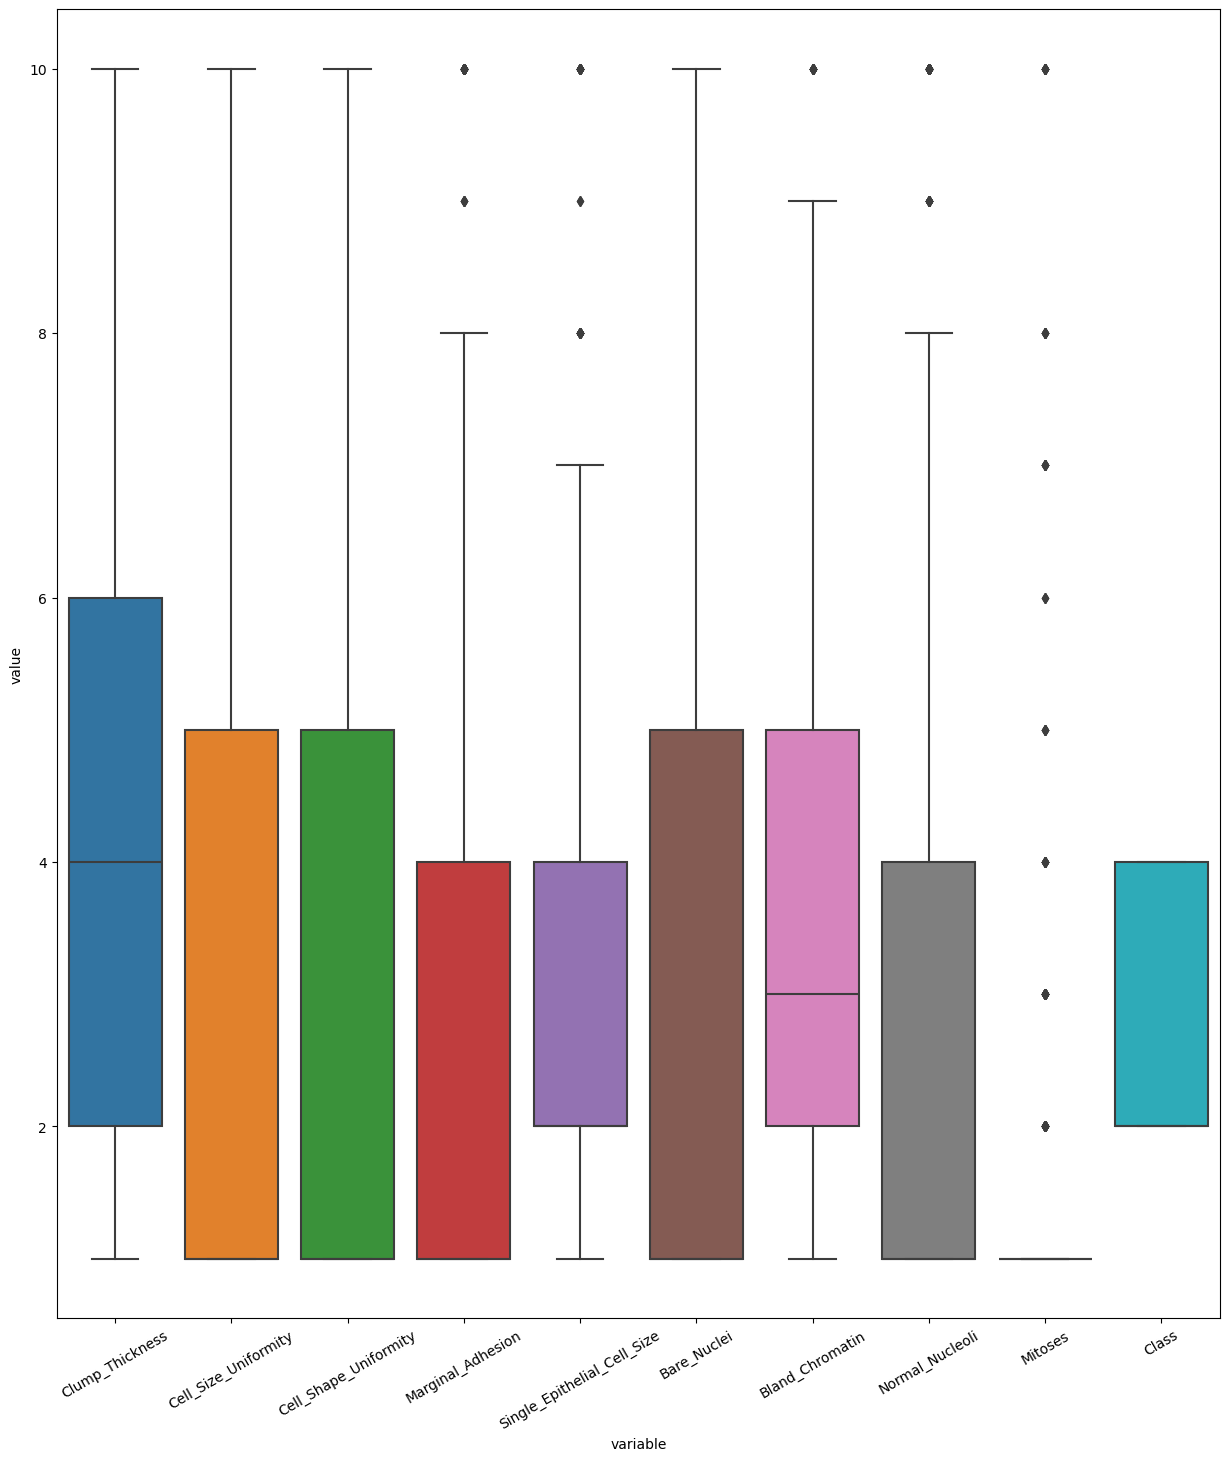

In [54]:
ax = sns.boxplot(x="variable", y="value", data=pd.melt(df.loc[:, df.columns != 'Sample_number']))
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
rcParams['figure.figsize'] = 15,17

<Axes: >

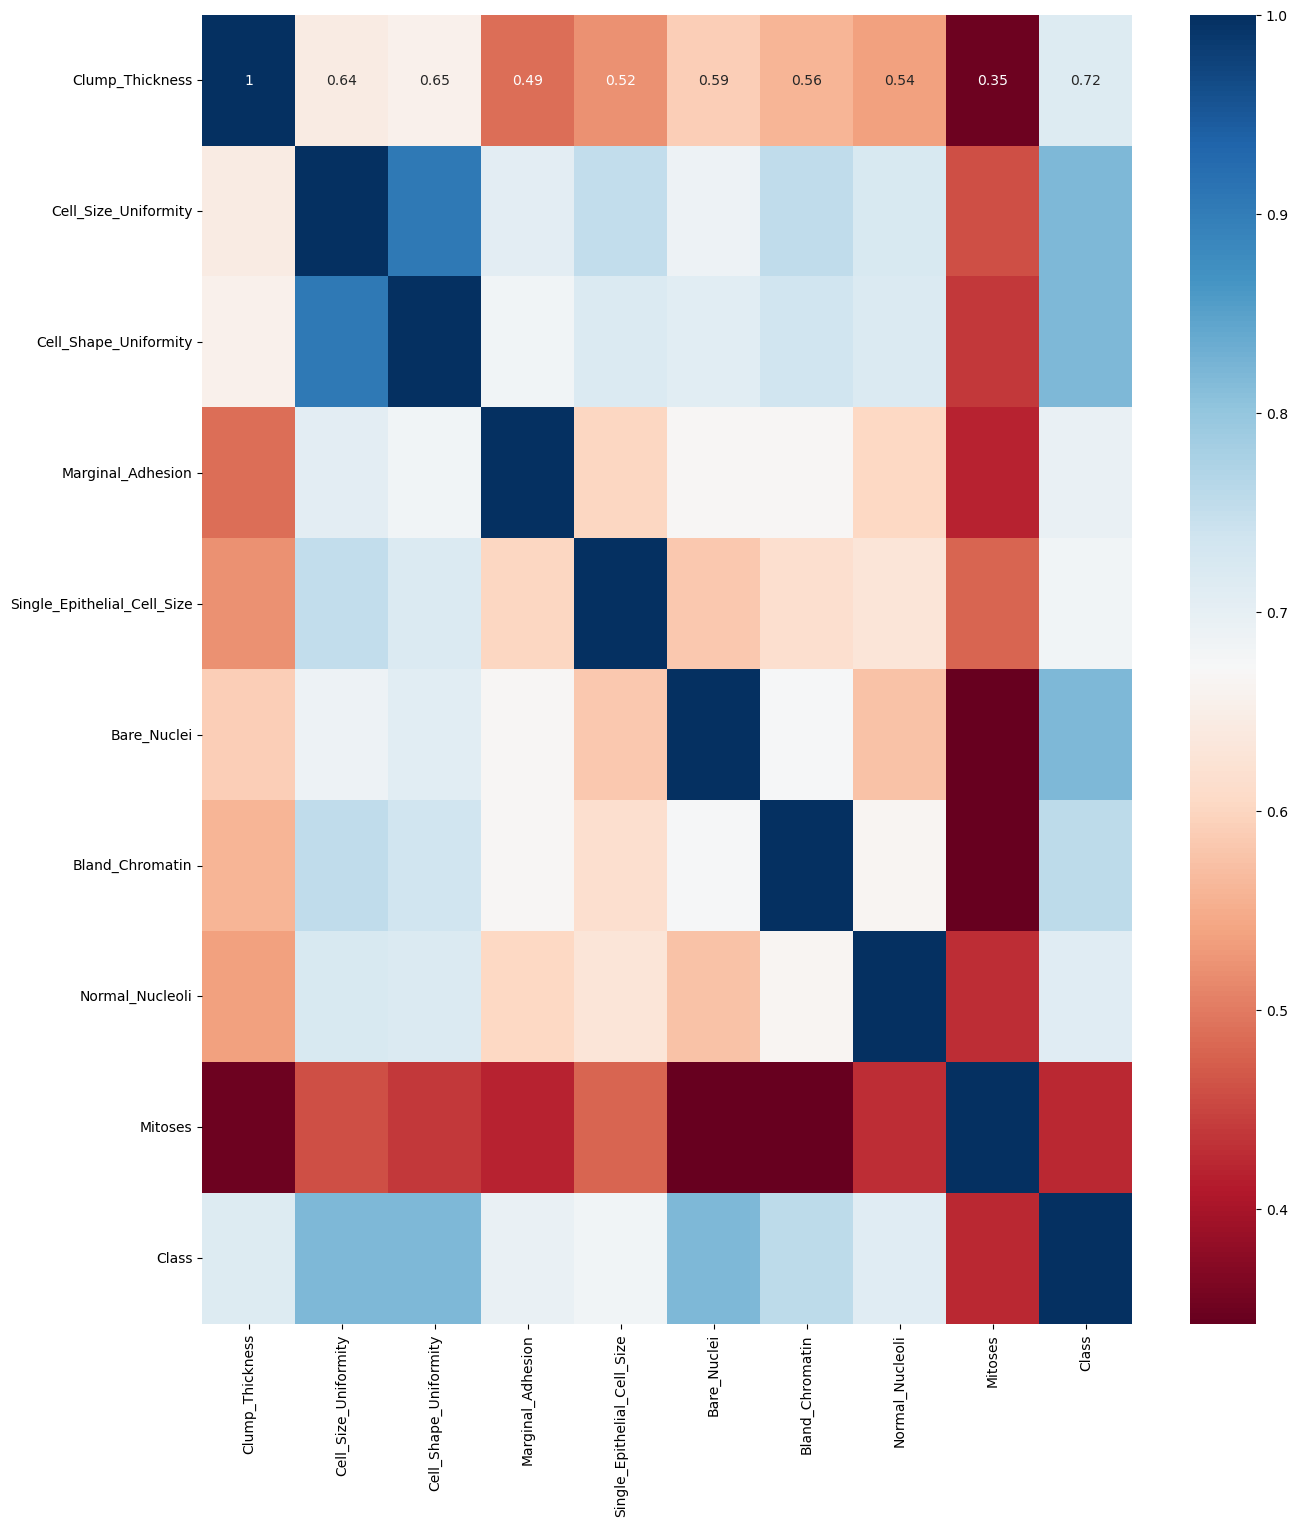

In [59]:
sns.heatmap(df.loc[:, df.columns != 'Sample_number'].corr(), annot=True, cmap=plt.cm.RdBu)

The annot option in the sns heatmap seems to be buggy. I tried to get it to show all values but it seems like there is a bug in the library that stops it from showing the remaining numbers. Upon checking online, it seems like this is a common problem that hasn't been resolved in the library yet.

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engineer** (if useful or necessary)

# Step 5: Prepare the Data (Answer)
 All steps needed were performed above except for normalisation whch will be done in section 7.

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
    1. <font color='maroon'>Clump_Thickness</font>
    1. <font color='maroon'>Cell_Size_Uniformity</font>
    1. <font color='maroon'>Cell_Shape_Uniformity</font>
    1. <font color='maroon'>Marginal_Adhesion</font>
    1. <font color='maroon'>Single_Epithelial_Cell_Size</font>
    1. <font color='maroon'>Bare_Nuclei</font>
    1. <font color='maroon'>Bland_Chromatin</font>
    1. <font color='maroon'>Normal_Nucleoli</font>
    1. <font color='maroon'>Mitoses</font>
- Is there an output variable (label)? <font color='maroon'> Yes</font>
- If there is an output variable:
    - What is it? <font color='maroon'> Class</font>
    - What is its type? <font color='maroon'> Categorical</font>
- What type of Modelling is it?
    - [X] Supervised
    - [ ] Unsupervised
- What type of Modelling is it?
    - [ ] Regression
    - [X] Classification (binary)
    - [ ] Classification (multi-class)
    - [ ] Clustering

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when splitting

In [67]:
df.drop('Sample_number', axis=1, inplace=True)

In [71]:
target = 'Class'
features = [c for c in df.columns if c != target]

In [72]:
X = df[features]
y = df[target]

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 100666001,
                                                    stratify = y)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 8: Define and Fit Models

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [77]:
kfold = KFold(n_splits = 10)
cart = DecisionTreeClassifier()
cart.fit(X_train, y_train)
results = cross_val_score(cart, X_train, y_train, cv = kfold)
print('Decision Tree, Cross-Validation mean: %.4f' % results.mean())

Decision Tree, Cross-Validation mean: 0.9325


In [78]:
num_trees = 100
model1 = BaggingClassifier(base_estimator = cart, n_estimators = num_trees, random_state = 7)
model1.fit(X_train, y_train)
results = cross_val_score(model1, X_train, y_train, cv = kfold)
print('Bagging, Cross-Validation mean: %.4f' % results.mean())

Bagging, Cross-Validation mean: 0.9510


# Step 9: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

## Decision Tree

In [109]:
y_pred_cart = cart.predict(X_train) 

In [110]:
print(classification_report(y_train, y_pred_cart))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00       320
           4       1.00      1.00      1.00       169

    accuracy                           1.00       489
   macro avg       1.00      1.00      1.00       489
weighted avg       1.00      1.00      1.00       489



In [111]:
cm_cart = confusion_matrix(y_train, y_pred_cart)

In [112]:
cm_cart

array([[320,   0],
       [  0, 169]], dtype=int64)

Text(158.22222222222223, 0.5, 'Predicted label')

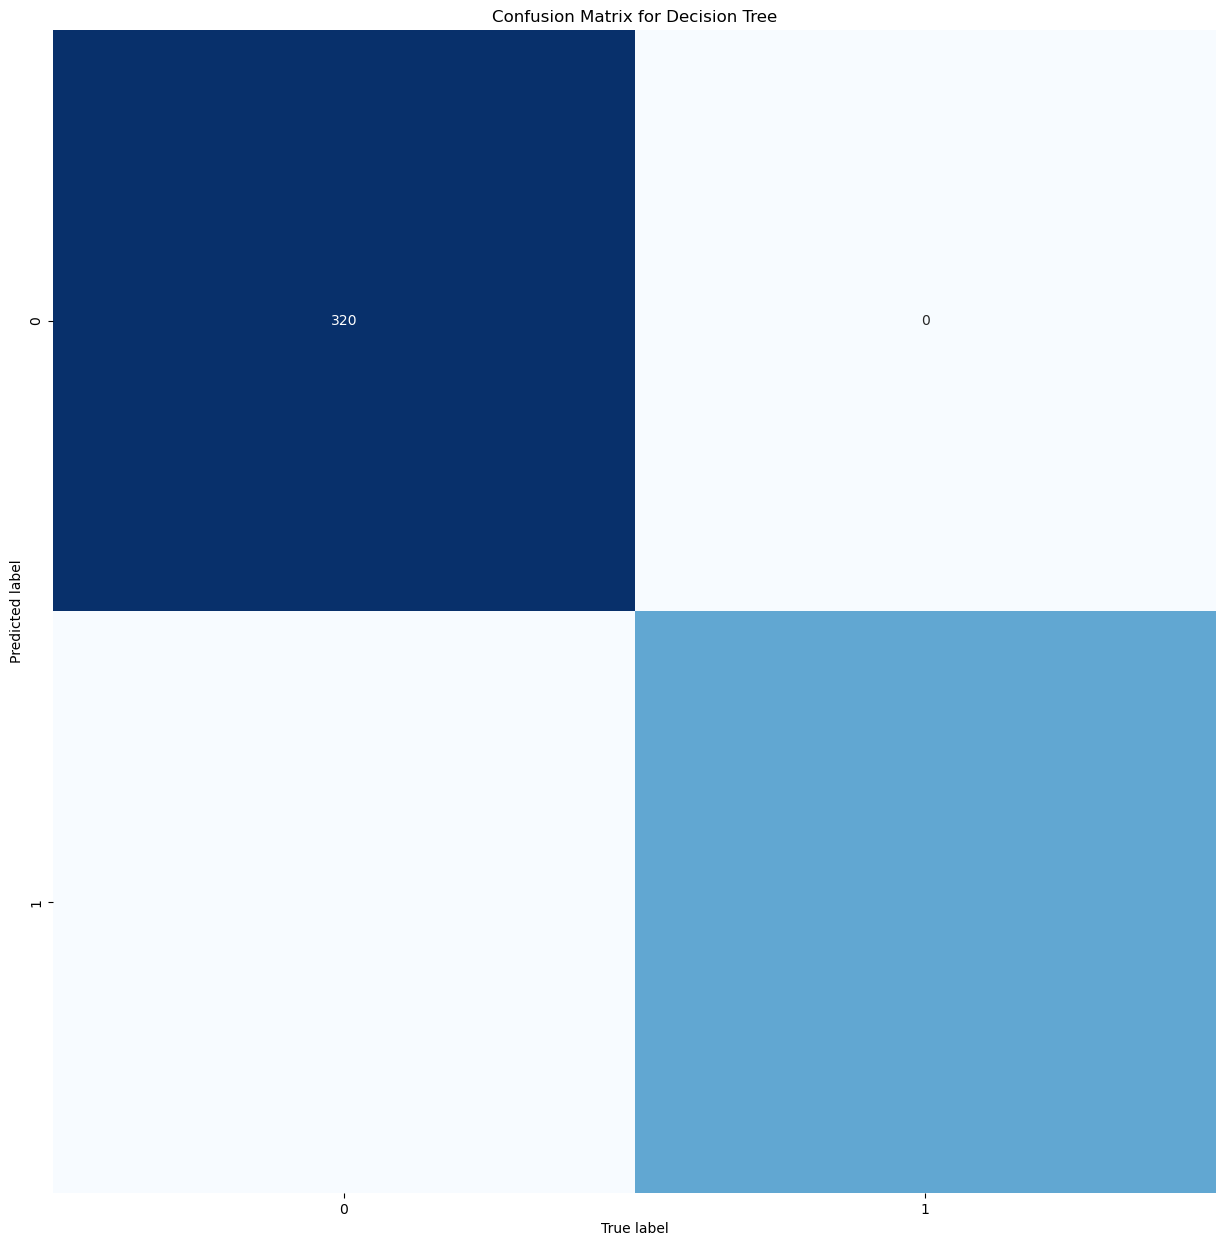

In [113]:
ax = sns.heatmap(cm_cart.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Blues')
ax.set_title('Confusion Matrix for Decision Tree')
ax.set_xlabel('True label')
ax.set_ylabel('Predicted label')

In [114]:
fpr_cart, tpr_cart, _ = roc_curve(y_train.map({2:0, 4:1}), pd.Series(y_pred_cart).map({2:0, 4:1}))
roc_auc_cart = auc(fpr_cart, tpr_cart)

In [115]:
roc_auc_cart

1.0

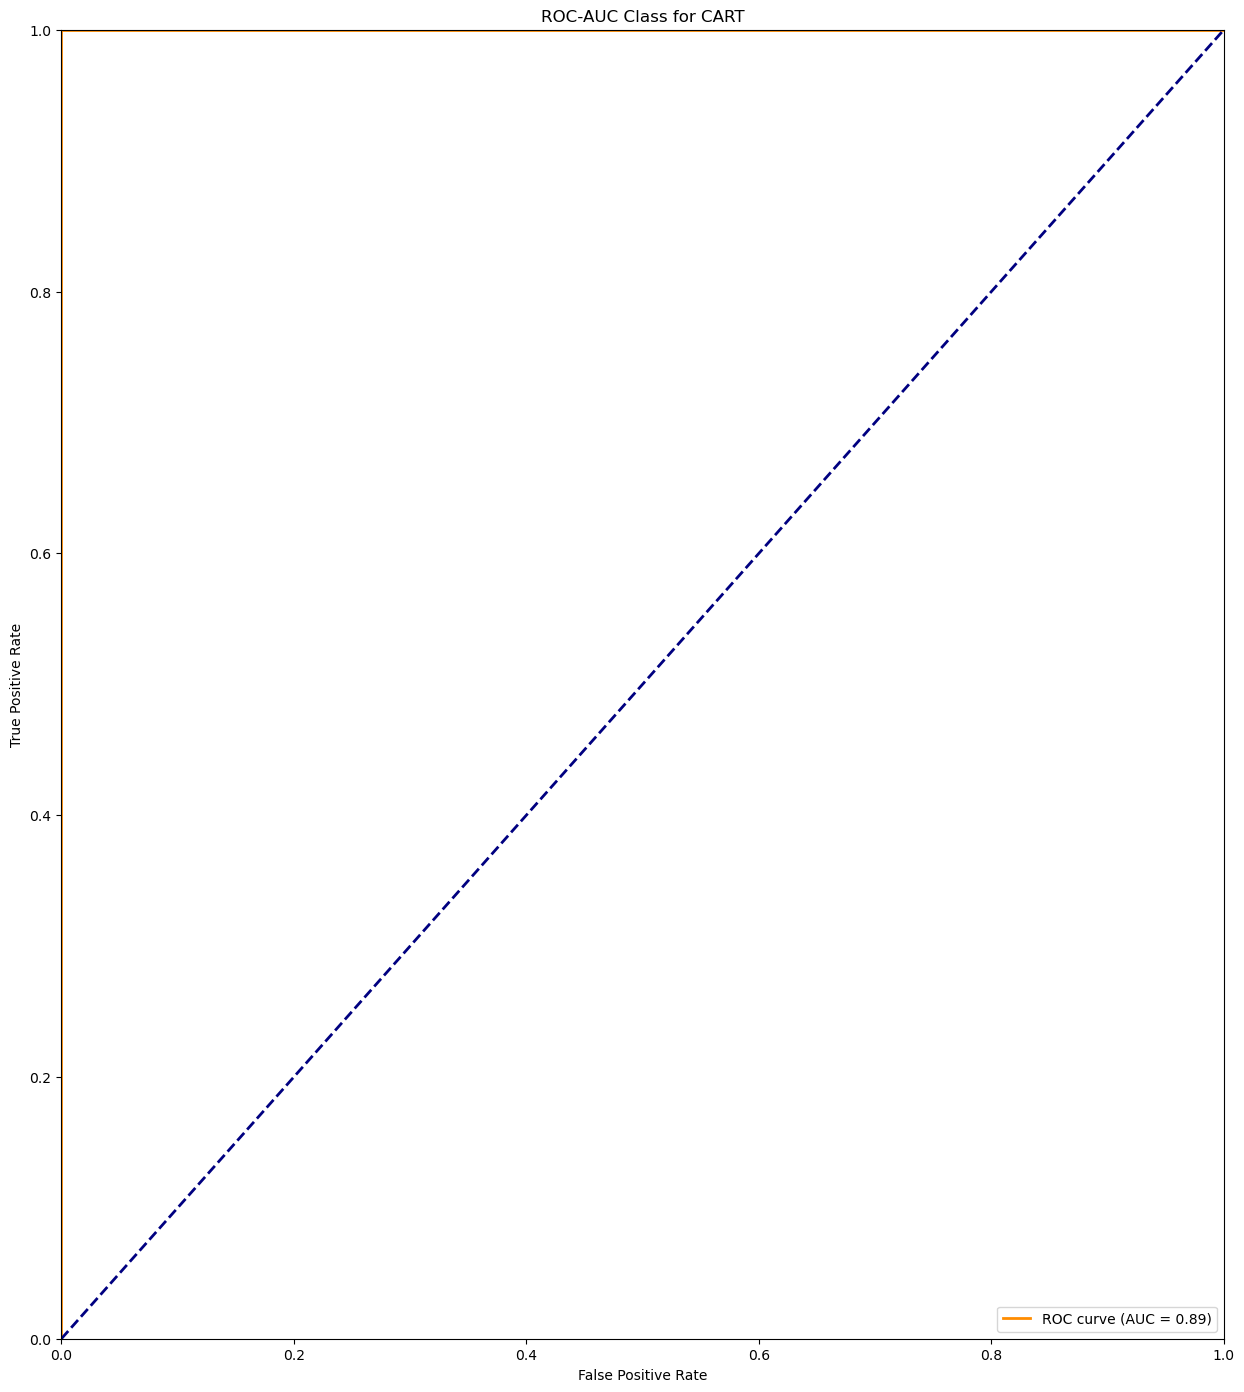

In [116]:
plt.plot(fpr_cart, tpr_cart, color='darkorange', lw=2,
               label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Class for CART')
plt.legend(loc='lower right')

## Bagging

In [117]:
y_pred_bag = model1.predict(X_train)

In [118]:
print(classification_report(y_train, y_pred_bag))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00       320
           4       1.00      1.00      1.00       169

    accuracy                           1.00       489
   macro avg       1.00      1.00      1.00       489
weighted avg       1.00      1.00      1.00       489



In [119]:
cm_bag = confusion_matrix(y_train, y_pred_bag)

In [120]:
cm_bag

array([[320,   0],
       [  0, 169]], dtype=int64)

Text(158.22222222222223, 0.5, 'Predicted label')

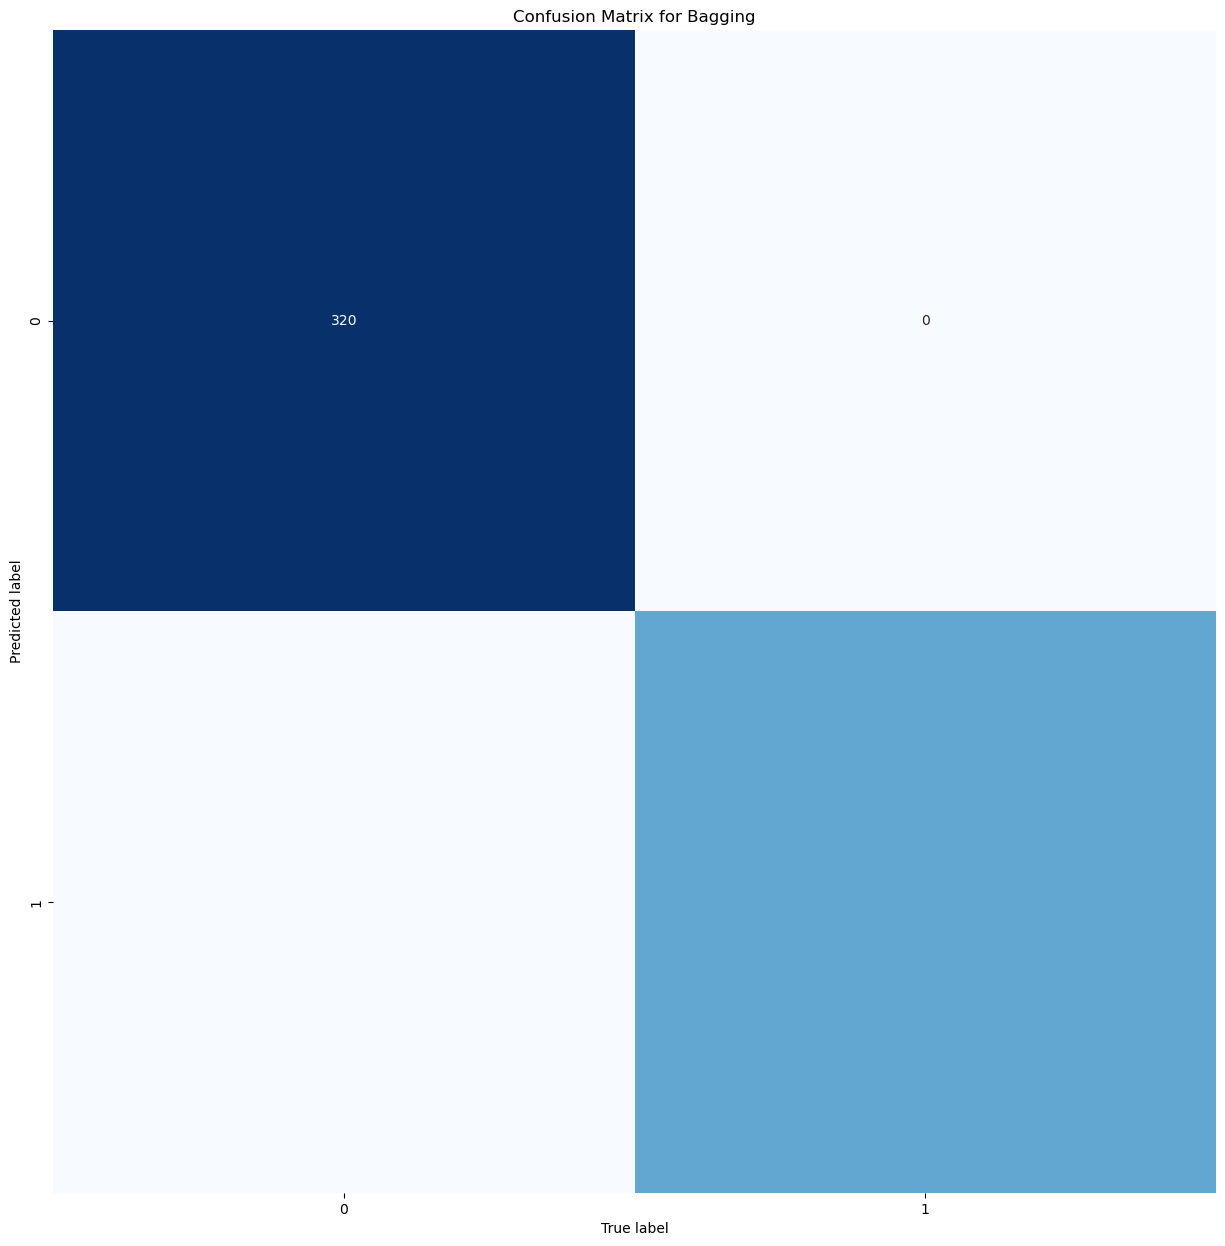

In [121]:
ax = sns.heatmap(cm_bag.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Blues')
ax.set_title('Confusion Matrix for Bagging')
ax.set_xlabel('True label')
ax.set_ylabel('Predicted label')

In [122]:
fpr_bag, tpr_bag, _ = roc_curve(y_train.map({2:0, 4:1}), pd.Series(y_pred_bag).map({2:0, 4:1}))
roc_auc_bag = auc(fpr_bag, tpr_bag)

In [123]:
roc_auc_bag

1.0

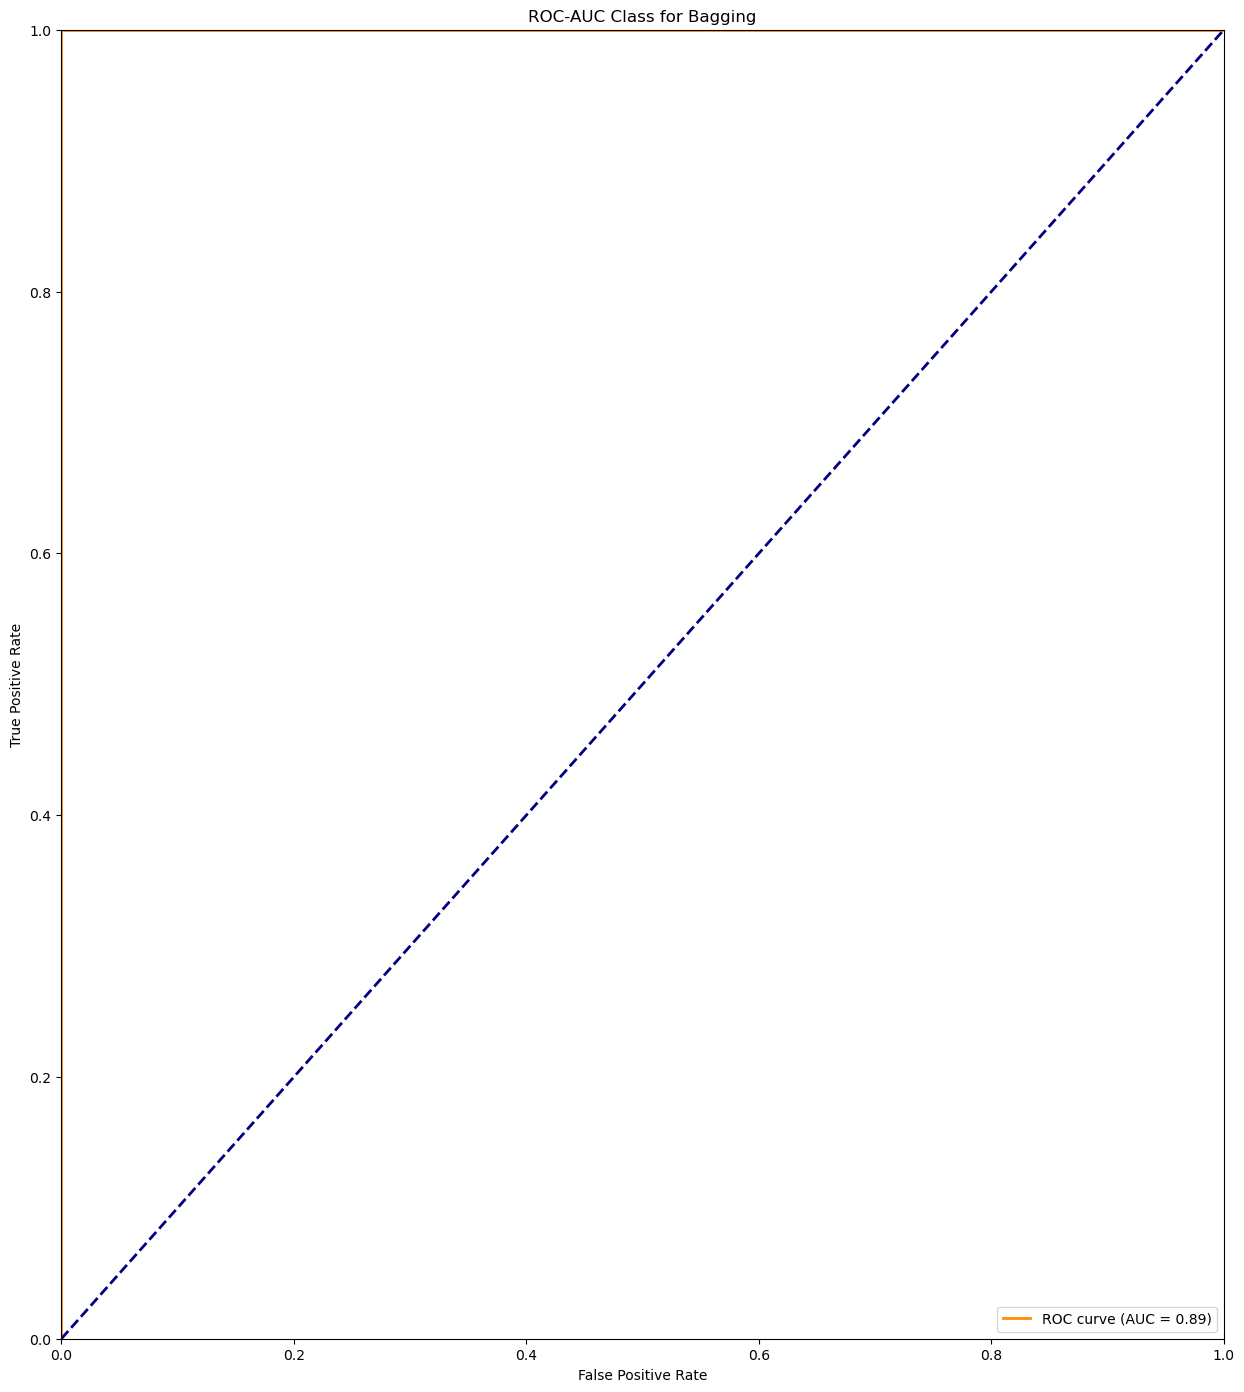

In [124]:
plt.plot(fpr_bag, tpr_bag, color='darkorange', lw=2,
               label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Class for Bagging')
plt.legend(loc='lower right')

# Step 10: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

In [125]:
predictions = model1.predict(X_test)
probabilities = model1.predict_proba(X_test)[:,1]

In [126]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           2       0.97      0.98      0.97       138
           4       0.96      0.94      0.95        72

    accuracy                           0.97       210
   macro avg       0.96      0.96      0.96       210
weighted avg       0.97      0.97      0.97       210



In [127]:
cm_bag_test = confusion_matrix(y_test, predictions)

Text(158.22222222222223, 0.5, 'Predicted label')

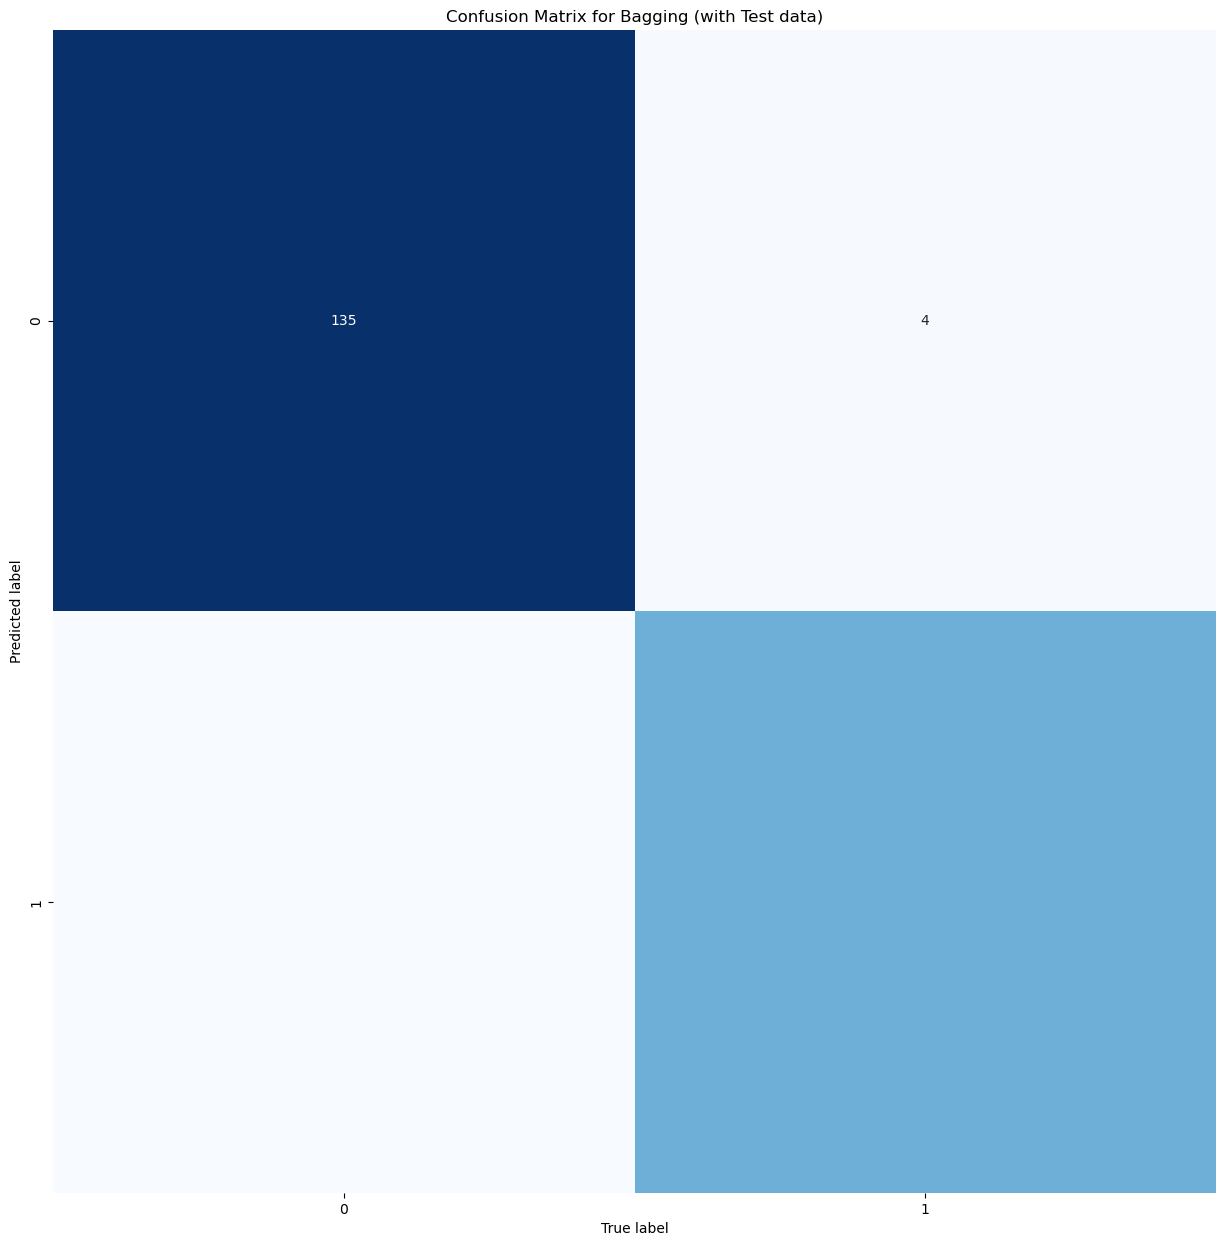

In [128]:
ax = sns.heatmap(cm_bag_test.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Blues')
ax.set_title('Confusion Matrix for Bagging (with Test data)')
ax.set_xlabel('True label')
ax.set_ylabel('Predicted label')

In [129]:
fpr_bag_test, tpr_bag_test, _ = roc_curve(y_test.map({2:0, 4:1}), pd.Series(predictions).map({2:0, 4:1}))
roc_auc_bag_test = auc(fpr_bag_test, tpr_bag_test)

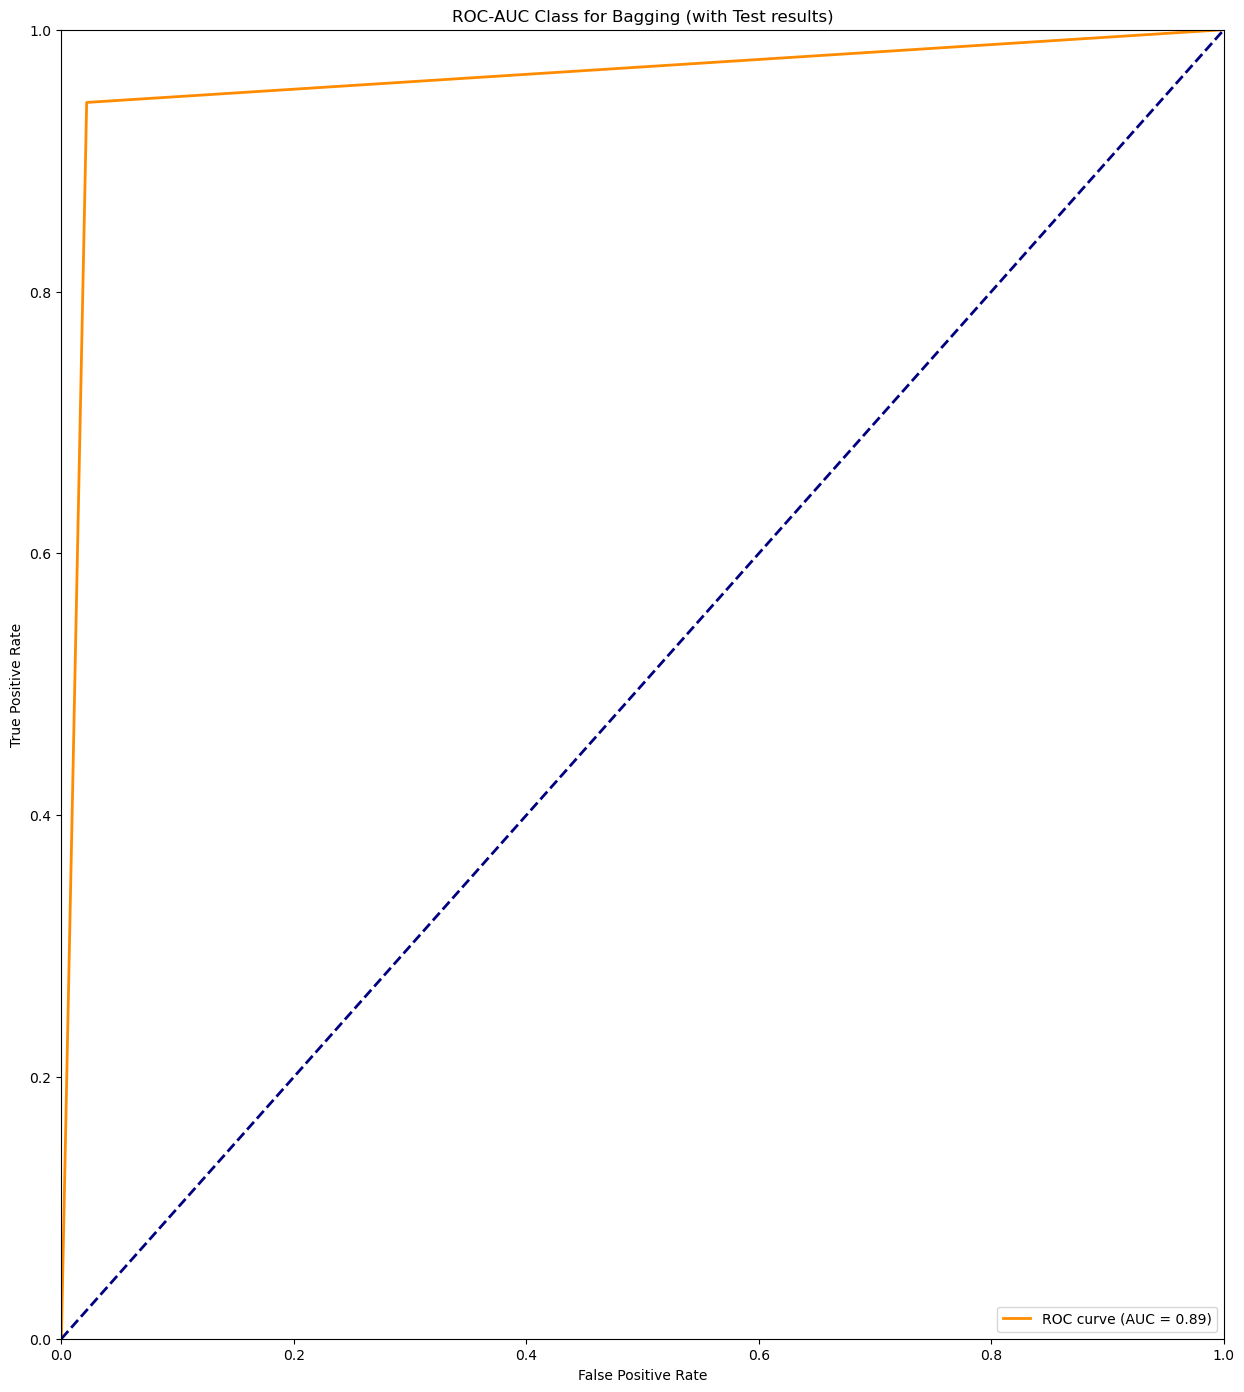

In [130]:
plt.plot(fpr_bag_test, tpr_bag_test, color='darkorange', lw=2,
               label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Class for Bagging (with Test results)')
plt.legend(loc='lower right')

# Step 11: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

# Step 11: Solve the Problem or Answer the Question (Answer)

The model can now be used to predict the Class based on the features.



---



---



> > > > > > > > > © 2024 Institute of Data


---



---



